<a href="https://colab.research.google.com/github/RahulAdepu1/IT496/blob/main/Assignment_DuPont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import requests
import pandas as pd

myAPIKey = '2d89f1ef931709b67725fae252df20b6'

stock = 'MSFT'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()

In [59]:
print(balanceStatements[1])

{'date': '2020-06-30', 'symbol': 'MSFT', 'reportedCurrency': 'USD', 'cik': '0000789019', 'fillingDate': '2020-07-30', 'acceptedDate': '2020-07-30 20:44:46', 'calendarYear': '2020', 'period': 'FY', 'cashAndCashEquivalents': 13576000000, 'shortTermInvestments': 122951000000, 'cashAndShortTermInvestments': 136527000000, 'netReceivables': 32011000000, 'inventory': 1895000000, 'otherCurrentAssets': 11482000000, 'totalCurrentAssets': 181915000000, 'propertyPlantEquipmentNet': 52904000000, 'goodwill': 43351000000, 'intangibleAssets': 7038000000, 'goodwillAndIntangibleAssets': 50389000000, 'longTermInvestments': 2965000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 13138000000, 'totalNonCurrentAssets': 119396000000, 'otherAssets': 0.0, 'totalAssets': 301311000000, 'accountPayables': 12530000000, 'shortTermDebt': 3749000000, 'taxPayables': 2130000000, 'deferredRevenue': 36000000000, 'otherCurrentLiabilities': 20031000000, 'totalCurrentLiabilities': 72310000000, 'longTermDebt': 67249000000, 'de

In [60]:
#The number from the two most recent years
fiveYearBalanceStatement = balanceStatements[:5]
fiveYearIncomeStatement = incomeStatements[:5]

In [61]:
#Calculate profitability, assetTurnOver, and capitalStructure

#profitability is net margin
profitability =  []

#assetTurnOver is net Asset Turnover
assetTurnOver =  []

#capitalStructure is Leverage
capitalStructure = []

#returnOnEquity is Retutn on Investment (DuPont)
returnOnEquity = []
year = []

#Getting Details
for i in range(0,5):
  profitabilityValue = fiveYearIncomeStatement[i]['netIncome']/fiveYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue = fiveYearIncomeStatement[i]['revenue']/fiveYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue = fiveYearBalanceStatement[i]['totalAssets']/fiveYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue = profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

  year.append(fiveYearIncomeStatement[i]['calendarYear'])

In [62]:
#Checking the values of years
print(year)

#Checking the values of each list
print(assetTurnOver)
print(capitalStructure)
print(profitability)
print(returnOnEquity)

['2021', '2020', '2019', '2018', '2017']
[0.5035906992351227, 0.4746424790332912, 0.43915674423149403, 0.4263505995796761, 0.3731033738997702]
[2.3507549933797223, 2.5469214903976196, 2.8003127137691783, 3.1292826228874007, 3.330193109926237]
[0.36451739564989766, 0.3096248645247002, 0.3118171054409065, 0.1501540413193186, 0.23573096164535853]
[0.4315223821731414, 0.37429841763592103, 0.3834652594547054, 0.20033124591987234, 0.2928972014255325]


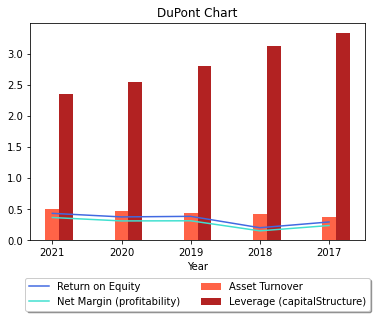

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#Asset Turnover (Sales/Total Assets) -> Bar Chart - (assetTurnOver)
#Leverage (Total Assets/Net Worth) -> Bar Chart - (capitalStructure)
#Net Margin -> Line Chart - (profitability)
#Return on Equity -> Line Chart - (returnOnEquity) 

labels = ['Return on Equity','Net Margin (profitability)','Asset Turnover','Leverage (capitalStructure)']
xpos = np.arange(len(year))
plt.xticks(xpos, year)
plt.bar(xpos + 0.0, assetTurnOver, color = 'tomato', width = 0.2)
plt.bar(xpos + 0.2, capitalStructure, color = 'firebrick', width = 0.2)
plt.plot(xpos, returnOnEquity, color = 'royalblue')
plt.plot(xpos, profitability, color = 'turquoise')


plt.title("DuPont Chart")
plt.xlabel("Year")

# Put a legend below current axis
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)

plt.show()